In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Импорт данных
PATH = 'D:/Python Project/fms/data/data.csv'
data = pd.read_csv(PATH)

In [4]:
data.shape

(11914, 16)

In [5]:
#Посмотрим на первые 10 строк
data.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [6]:
# Переводим все имена столбцов в нижний регистр и заменяем пробелы на символ подчеркивания
data.columns = data.columns.str.lower().str.replace(' ','_')

# Выбираем только столбцы со строковыми значениями
string_columns = list(data.dtypes[data.dtypes == 'object'].index)

# Понижаем регистр и заменяем пробелы символами подчеркивания для значений во всех строковых столбцах датафрейма
for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ','_')

In [7]:
data.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


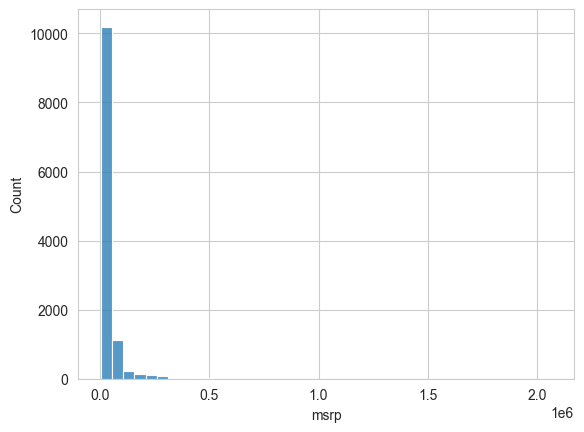

In [8]:
# Распределение msrp
sns.histplot(data.msrp,bins=40);
#Из гистограммы отмечаем, что распределение цен имеет очень длинный "хвост".
# Это типичная ситуация, когда есть множество товаров с низкими ценами и оцень небольшое количество дорогих.

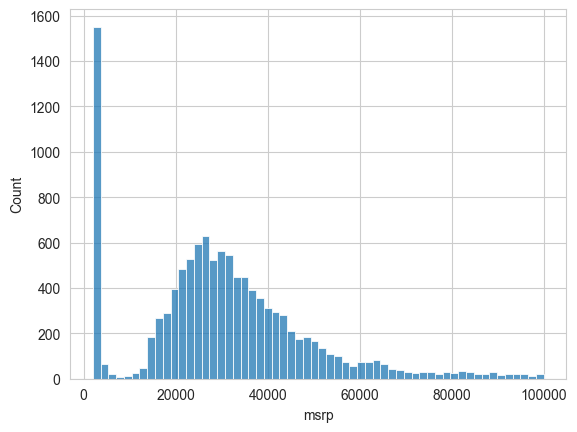

In [9]:
sns.histplot(data.msrp[data.msrp < 100000]);

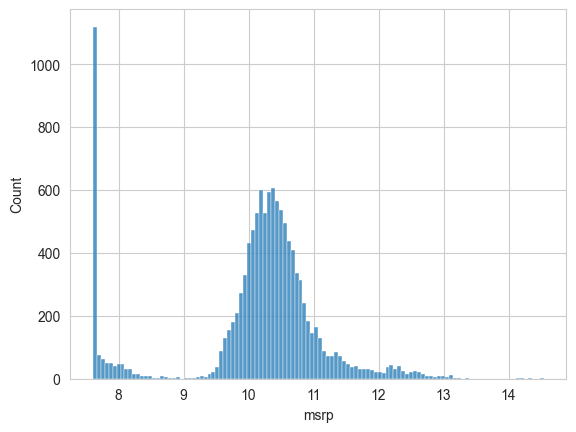

In [10]:
log_price = np.log1p(data.msrp)
sns.histplot(log_price);

In [11]:
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_test + n_val)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train + n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [12]:
y_train = np.log1p(data_train.msrp.values)
y_val = np.log1p(data_val.msrp.values)
y_test = np.log1p(data_test.msrp.values)

del data_train['msrp']
del data_val['msrp']
del data_test['msrp']

In [13]:
# Линейная регрессия, реализованная с помощью numpy
def train_linear_regression(X,y):
    # Добавляем фиктивный столбец
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    # Формула нормального уравнения
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]




In [14]:
# Базовое решение
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
data_num = data_train[base]
data_num = data_num.fillna(0)

X_train = data_num.values

w_0,w = train_linear_regression(X_train,y_train)

In [15]:
y_pred = w_0 + X_train.dot(w)

<Axes: ylabel='Count'>

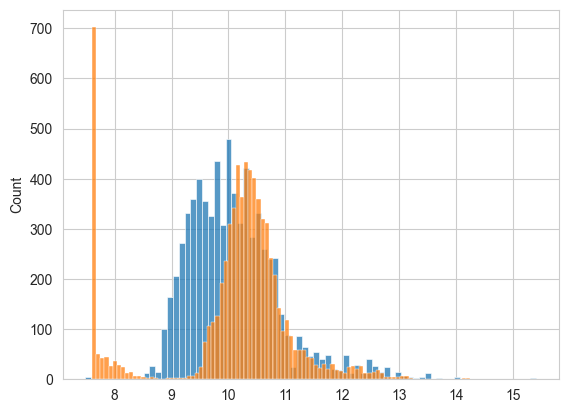

In [16]:
sns.histplot(y_pred,label = 'pred')
sns.histplot(y_train,label = 'target')